<a href="https://colab.research.google.com/github/ThamaraCrispim/public-data-analysis/blob/main/Pol%C3%ADcia%20Rodovi%C3%A1ria%20Federal%20(PRF)%20%E2%80%94%20Dados%20Abertos/An%C3%A1lise%20Explorat%C3%B3ria%20de%20Acidentes%20em%20Rodovias%20Federais%20(PRF)-2025/analise_exploratoria_acidentes_prf_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Introdução

A Polícia Rodoviária Federal (PRF) é responsável pela fiscalização e segurança de mais de 70 mil quilômetros de rodovias federais em todo o Brasil. Nessas rodovias, ocorrem diariamente diversos acidentes de trânsito, que afetam a segurança das pessoas, o tráfego e os serviços públicos.

Os registros de acidentes disponibilizados pela PRF em 2025 formam uma base de dados importante para entender melhor como esses eventos acontecem. Por meio da análise desses dados, é possível identificar padrões, locais mais perigosos e condições que aumentam o risco de acidentes graves.

**Objetivo do Projeto**

O objetivo deste projeto é realizar uma análise exploratória dos dados de acidentes de 2025, buscando compreender os principais fatores relacionados à ocorrência e à gravidade dos sinistros. A partir dessa análise, pretende-se gerar informações que possam apoiar ações de prevenção e melhoria da segurança nas rodovias.

**Perguntas de Negócio**

Este estudo foi conduzido com base nas seguintes perguntas:

* Quais estados e rodovias concentram o maior número de acidentes e de óbitos?

* Em quais meses, dias e horários acontecem mais acidentes?

* Como fatores como clima, tipo de pista e condições da via influenciam a gravidade dos acidentes?    

Responder a essas perguntas permite transformar os dados em conhecimento útil, contribuindo para um melhor entendimento da realidade das rodovias brasileiras.

Fonte dos Dados: Polícia Rodoviária Federal – Dados Abertos
https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos/dados-abertos-da-prf

In [ ]:
#bibliotecas
import pandas as pd
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import numpy as np



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**EDA – Análise Descritiva Exploratória**



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Pod Academy/Dados/datatran2025.csv',delimiter=';',
                            encoding='ISO-8859-1')

In [ ]:
display(df)

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,652493,2025-01-01,quarta-feira,06:20:00,SP,116,225,GUARULHOS,Reação tardia ou ineficiente do condutor,Tombamento,...,0,0,1,1,2,"-23,48586772","-46,54075317",SPRF-SP,DEL01-SP,UOP01-DEL01-SP
1,652519,2025-01-01,quarta-feira,07:50:00,CE,116,"546,2",PENAFORTE,Pista esburacada,Colisão frontal,...,0,1,4,1,6,"-7,812288","-39,08333306",SPRF-CE,DEL05-CE,UOP03-DEL05-CE
2,652522,2025-01-01,quarta-feira,08:45:00,PR,369,"88,2",CORNELIO PROCOPIO,Reação tardia ou ineficiente do condutor,Colisão traseira,...,0,2,0,3,2,"-23,182565","-50,637228",SPRF-PR,DEL07-PR,UOP05-DEL07-PR
3,652544,2025-01-01,quarta-feira,11:00:00,PR,116,74,CAMPINA GRANDE DO SUL,Reação tardia ou ineficiente do condutor,Saída de leito carroçável,...,0,4,0,1,2,"-25,36517687","-49,04223028",SPRF-PR,DEL01-PR,UOP02-DEL01-PR
4,652549,2025-01-01,quarta-feira,09:30:00,MG,251,471,FRANCISCO SA,Velocidade Incompatível,Colisão frontal,...,1,1,2,2,4,"-16,46801304","-43,43121303",SPRF-MG,DEL12-MG,UOP01-DEL12-MG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72471,747145,2025-12-19,sexta-feira,18:56:00,SE,235,"23,9",LARANJEIRAS,Ultrapassagem Indevida,Colisão lateral mesmo sentido,...,1,4,1,8,5,"-10,814491","-37,249336",SPRF-SE,DEL01-SE,UOP02-DEL01-SE
72472,747150,2025-12-10,quarta-feira,12:40:00,RJ,116,182,RIO DE JANEIRO,Condutor deixou de manter distância do veículo...,Colisão traseira,...,0,0,0,1,1,"-22,96229624","-43,39875195",SPRF-RJ,DEL06-RJ,UOP01-DEL06-RJ
72473,747182,2025-12-24,quarta-feira,21:45:00,PR,277,"431,8",VIRMOND,Reação tardia ou ineficiente do condutor,Queda de ocupante de veículo,...,1,0,0,1,1,"-25,3843132","-52,17912421",SPRF-PR,DEL04-PR,UOP02-DEL04-PR
72474,747189,2025-12-21,domingo,01:10:00,PR,277,"464,4",LARANJEIRAS DO SUL,Ausência de reação do condutor,Saída de leito carroçável,...,0,0,0,2,1,"-25,38480633","-52,42636621",SPRF-PR,DEL04-PR,UOP02-DEL04-PR


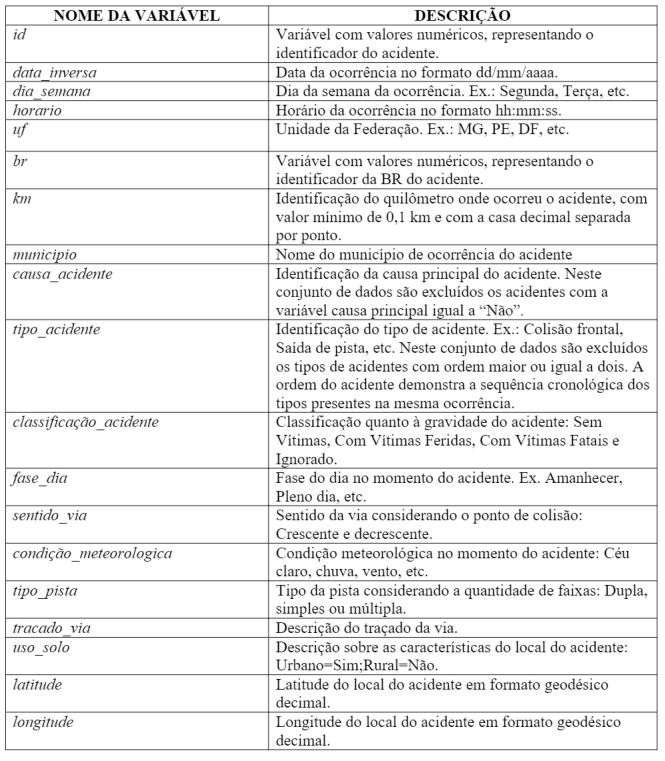

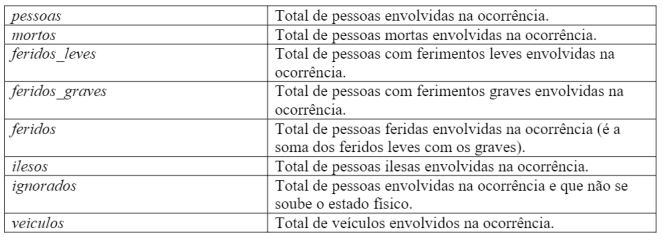

In [ ]:
df.shape

(72476, 30)

In [ ]:
#Analise de dados duplicados
if df.duplicated().any():
  print('existe dados duplicados no DataFrame.')
else:
  print('Não existem dados duplicados.')

Não existem dados duplicados.


O DataFrame analisado contém 72.476 registros de acidentes ocorridos em rodovias federais, coletados pela Polícia Rodoviária Federal. Cada registro possui 30 características que descrevem o evento, como data, dia da semana, localidade, tipo de acidente e outras informações relevantes para a análise.

In [ ]:
## verificando o tipo dos dados
df.dtypes


,0
id,int64
data_inversa,object
dia_semana,object
horario,object
uf,object
br,int64
km,object
municipio,object
causa_acidente,object
tipo_acidente,object


In [ ]:
df.describe()

,id,br,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
count,72476.000000,72476.000000,72476.000000,72476.000000,72476.000000,72476.000000,72476.000000,72476.000000,72476.000000,72476.000000
mean,700795.698728,208.490052,2.596556,0.083338,0.875987,0.275981,1.053383,0.394558,1.151968,1.998234
std,26905.479194,128.569261,2.251565,0.338750,1.037559,0.610767,1.830855,0.860407,1.143117,1.126383
min,652468.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,672781.750000,101.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,703833.500000,155.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
75%,723662.250000,319.000000,3.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000
max,747277.000000,495.000000,76.000000,16.000000,41.000000,22.000000,71.000000,81.000000,49.000000,82.000000


Insights iniciais:

- A maioria dos acidentes apresenta baixa complexidade, envolvendo poucas pessoas e poucos veículos.

- Em pelo menos 75% das ocorrências não houve vítimas fatais, indicando baixa gravidade predominante.

- Existem eventos extremos e raros, com alto número de envolvidos e vítimas, que se destacam como outliers na base.

In [ ]:
def generate_metadata(dataframe):
    """
    Gera um DataFrame de metadados do DataFrame de acidentes da PRF.
    """

    metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo_dado': dataframe.dtypes.astype(str),
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe)) * 100, 2),
        'cardinalidade': dataframe.nunique(dropna=True)
    })

    # Ordenação apenas para leitura (não analítica)
    metadata = metadata.sort_values(
        by=['percent_nulos', 'cardinalidade'],
        ascending=[False, True]
    ).reset_index(drop=True)

    return metadata


# Aplicação
metadata_df = generate_metadata(df)
metadata_df


,nome_variavel,tipo_dado,qt_nulos,percent_nulos,cardinalidade
0,uop,object,40,0.06,395
1,delegacia,object,24,0.03,153
2,regional,object,4,0.01,28
3,uso_solo,object,0,0.00,2
4,classificacao_acidente,object,1,0.00,3
5,sentido_via,object,0,0.00,3
6,tipo_pista,object,0,0.00,3
7,fase_dia,object,0,0.00,4
8,dia_semana,object,0,0.00,7
9,condicao_metereologica,object,0,0.00,9


# Limpeza e Transformação dos Dados

 Tratamento de valores ausentes em classificacao_acidente
Durante o processo de limpeza, foram identificados 1 registros com valor ausente (NaN) na variável classificacao_acidente.

Como ambos apresentavam mortos = 0, esses casos foram recategorizados como "Sem Vítimas", mantendo a coerência lógica entre as variáveis e a definição da classificação do acidente.

In [ ]:
# Visualizando a cardinalidade de 'classificacao_acidente'
df['classificacao_acidente'].unique()

array(['Com Vítimas Feridas', nan, 'Com Vítimas Fatais', 'Sem Vítimas'],
      dtype=object)

In [ ]:
# Visualizar os registros que estão NoN em 'classificacao_acidente':
display(df[df['classificacao_acidente'].isna()])

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
1,652519,2025-01-01,quarta-feira,07:50:00,CE,116,"546,2",PENAFORTE,Pista esburacada,Colisão frontal,...,0,1,4,1,6,"-7,812288","-39,08333306",SPRF-CE,DEL05-CE,UOP03-DEL05-CE


In [ ]:
# Cardinalidade de classificacao_acidente x mortos
df[['classificacao_acidente', 'mortos']].drop_duplicates()

,classificacao_acidente,mortos
0,Com Vítimas Feridas,0
1,NaN,1
5,Com Vítimas Fatais,2
8,Com Vítimas Fatais,1
9,Sem Vítimas,0
43,Com Vítimas Fatais,5
396,Com Vítimas Fatais,3
1182,Com Vítimas Fatais,6
4217,Com Vítimas Fatais,4
7327,Com Vítimas Fatais,9


In [ ]:
# Fazendo a alteração dos dois valores NoN para 'Sem Vítimas'
df.loc[(df['classificacao_acidente'].isna()) & (df['mortos'] == 0), 'classificacao_acidente'] = 'Sem Vítimas'
# Conferindo alteração

In [ ]:
# Conferindo alteração
df[df['classificacao_acidente'].isna()]

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
1,652519,2025-01-01,quarta-feira,07:50:00,CE,116,"546,2",PENAFORTE,Pista esburacada,Colisão frontal,...,0,1,4,1,6,"-7,812288","-39,08333306",SPRF-CE,DEL05-CE,UOP03-DEL05-CE


Transformação dos tipos de dados das colunas

In [ ]:
# Transformando as colunas de horário e data_inversa em datetime
df['horario'] = pd.to_datetime(df['horario'], format='%H:%M:%S', errors='coerce')
df['data_inversa'] = pd.to_datetime(df['data_inversa'], format='%Y-%m-%d', errors='coerce')

# Verificando a transformação
df[['horario', 'data_inversa']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72476 entries, 0 to 72475
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   horario       72476 non-null  datetime64[ns]
 1   data_inversa  72476 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 1.1 MB


In [ ]:
# To prevent the AttributeError on re-execution, explicitly convert the columns to string type first.
df['latitude'] = df['latitude'].astype(str).str.replace(',', '.')
df['longitude'] = df['longitude'].astype(str).str.replace(',', '.')

# Handle potential string representations of NaN ('NaN' or 'nan') before converting to float.
df['latitude'] = df['latitude'].replace(['NaN', 'nan'], np.nan).astype(float)
df['longitude'] = df['longitude'].replace(['NaN', 'nan'], np.nan).astype(float)

AttributeError: Can only use .str accessor with string values!

In [ ]:
# Verificando a transformação
df[['latitude', 'longitude']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72476 entries, 0 to 72475
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   72476 non-null  float64
 1   longitude  72476 non-null  float64
dtypes: float64(2)
memory usage: 1.1 MB


In [ ]:
# Verificando quantos valores nulos realmente existem nas colunas.
print(df[['latitude', 'longitude']].isna().sum())

# Vamos verificar quantos registros estão sem coordenadas nas duas variáveis
sem_coordenadas = df[df['latitude'].isna() & df['longitude'].isna()]
print(f'Registros sem coordenadas: {sem_coordenadas.shape[0]} de {df.shape[0]}')

latitude     0
longitude    0
dtype: int64
Registros sem coordenadas: 0 de 72476


Durante a etapa de preparação dos dados, foram realizadas transformações de tipo em variáveis que continham informações temporais e geográficas, a fim de padronizar o formato e permitir análises consistentes:

* Coluna data_inversa: convertida de object para o tipo datetime, possibilitando operações temporais como extração de ano, mês, dia da semana e comparações entre períodos.

* Coluna horario: convertida de object para o tipo datetime.time, permitindo análises relacionadas à distribuição dos acidentes ao longo do dia (manhã, tarde, noite e madrugada).

* Colunas latitude e longitude: inicialmente armazenadas como object (string), foram padronizadas substituindo vírgulas por pontos decimais e convertidas para o tipo float. Essa transformação possibilita o uso futuro em análises geográficas ou visualizações em mapas.

Observação: O resultado dos registros sem coordenadas 0 de 140.922  indica que  não existe valores ausência

 Criação de Variáveis Derivadas

In [ ]:
meses = {1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril', 5: 'Maio', 6: 'Junho',
         7: 'Julho', 8: 'Agosto', 9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'}

df['nome_mes'] = df['data_inversa'].dt.month.map(meses)

# Conferindo a criação da variável
df['nome_mes'].unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [ ]:
def definir_turno(hora: datetime) -> str:
    if (hora >= 6) & (hora < 12):
        return 'Manhã'
    if (hora >= 12) & (hora < 18):
        return 'Tarde'
    if (hora >= 18) & (hora < 24):
        return 'Noite'
    else:
        return 'Madrugada'

df['turno'] = df['horario'].dt.hour.apply(definir_turno)

# Conferindo a criação da variável
df[['horario', 'turno']].head(10)

,horario,turno
0,1900-01-01 06:20:00,Manhã
1,1900-01-01 07:50:00,Manhã
2,1900-01-01 08:45:00,Manhã
3,1900-01-01 11:00:00,Manhã
4,1900-01-01 09:30:00,Manhã
5,1900-01-01 10:40:00,Manhã
6,1900-01-01 12:23:00,Tarde
7,1900-01-01 17:45:00,Tarde
8,1900-01-01 18:40:00,Noite
9,1900-01-01 17:00:00,Tarde


In [ ]:

df.describe(include='all')

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop,nome_mes,turno
count,72476.000000,72476,72476,72476,72476,72476.000000,72476,72476,72476,72476,...,72476.000000,72476.000000,72476.000000,72476.000000,72476.000000,72472,72452,72436,72476,72476
unique,NaN,NaN,7,NaN,27,NaN,7653,1845,69,17,...,NaN,NaN,NaN,NaN,NaN,28,153,395,12,4
top,NaN,NaN,sábado,NaN,MG,NaN,2,BRASILIA,Ausência de reação do condutor,Colisão traseira,...,NaN,NaN,NaN,NaN,NaN,SPRF-MG,DEL01-PR,UOP01-DEL01-SC,Dezembro,Tarde
freq,NaN,NaN,11545,NaN,9559,NaN,348,1011,11456,14357,...,NaN,NaN,NaN,NaN,NaN,9543,2597,1235,6757,22285
mean,700795.698728,2025-07-06 13:18:50.327280640,NaN,1900-01-01 13:17:46.334510848,NaN,208.490052,NaN,NaN,NaN,NaN,...,0.394558,1.151968,1.998234,-18.766108,-46.378619,NaN,NaN,NaN,NaN,NaN
min,652468.000000,2025-01-01 00:00:00,NaN,1900-01-01 00:00:00,NaN,0.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,1.000000,-33.689326,-72.665988,NaN,NaN,NaN,NaN,NaN
25%,672781.750000,2025-04-08 00:00:00,NaN,1900-01-01 08:15:00,NaN,101.000000,NaN,NaN,NaN,NaN,...,0.000000,1.000000,1.000000,-25.005339,-50.103938,NaN,NaN,NaN,NaN,NaN
50%,703833.500000,2025-07-08 00:00:00,NaN,1900-01-01 14:00:00,NaN,155.000000,NaN,NaN,NaN,NaN,...,0.000000,1.000000,2.000000,-20.362581,-46.859232,NaN,NaN,NaN,NaN,NaN
75%,723662.250000,2025-10-06 00:00:00,NaN,1900-01-01 18:20:00,NaN,319.000000,NaN,NaN,NaN,NaN,...,1.000000,1.000000,2.000000,-12.642687,-42.266029,NaN,NaN,NaN,NaN,NaN
max,747277.000000,2025-12-31 00:00:00,NaN,1900-01-01 23:59:00,NaN,495.000000,NaN,NaN,NaN,NaN,...,81.000000,49.000000,82.000000,4.461419,-34.827891,NaN,NaN,NaN,NaN,NaN


Insights:

* A base contém 72.476 registros de acidentes, sem grandes problemas de dados faltantes.

* O estado com mais acidentes registrados é Minas Gerais (MG), sendo o principal foco das ocorrências.

* O município com maior número de registros é Brasília, indicando alta concentração de acidentes na capital federal.

* O dia da semana com mais acidentes é o sábado, mostrando maior risco nos finais de semana.

* O turno com maior volume de ocorrências é o período da tarde, indicando maior exposição nesse horário.

* A causa mais frequente dos acidentes é “ausência de reação do condutor”, sugerindo possível relação com distração ou falta de atenção.

* O tipo de acidente mais comum é colisão traseira, típico de trânsito intenso e pouca distância entre veículos.

**Respostas às Perguntas de Negócio**



 1 - Quais estados e rodovias concentram o maior número de acidentes e de óbitos?





In [ ]:
# Agrupamento por Ano e Estado.
df['ano'] = df['data_inversa'].dt.year

df_uf_ano = (
    df
    .groupby(['uf', 'ano'])
    .size()
    .reset_index(name='quantidade')
)

# Transformando em PIVOT Table
df_uf_ano = df_uf_ano.pivot(index='uf', columns='ano', values='quantidade')

df_uf_ano.columns = ['2025']

df_uf_ano_sorted = df_uf_ano.sort_values(by='2025', ascending=False)
display(df_uf_ano_sorted)

,2025
uf,
MG,9559
SC,8184
PR,7616
RJ,6420
RS,4899
SP,4681
BA,4106
GO,3196
PE,3012


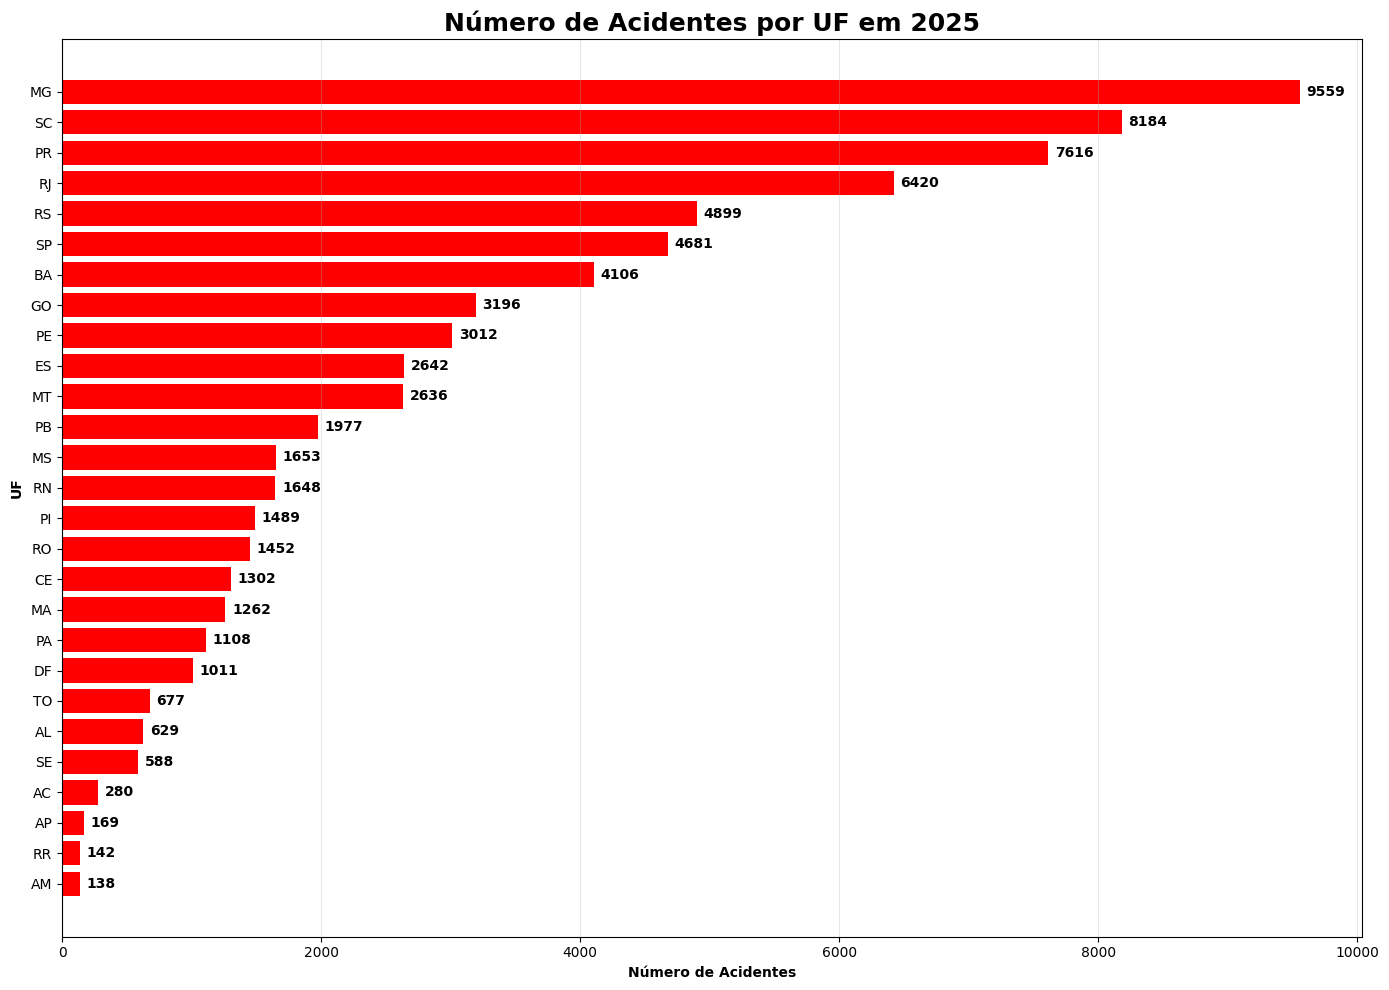

In [ ]:
# Preparando os dados para o gráfico
df_plot = df_uf_ano_sorted.reset_index()
# Ordenando do menor para o maior para que o maior fique no topo do gráfico de barras horizontais
df_plot = df_plot.sort_values(by='2025', ascending=True)

# Criando o gráfico
plt.figure(figsize=(14, 10))
plt.barh(df_plot['uf'], df_plot['2025'], color='red') # Usando uma cor azul padrão

# Colocando os rótulos ao lado das barras
for i, v in enumerate(df_plot['2025']):
    plt.text(
        v + 50,  # Desloca o texto um pouco para a direita da barra
        i,
        f'{v}',
        fontweight='bold',
        ha='left', # Alinha o texto à esquerda
        va='center' # Alinha verticalmente ao centro
    )

plt.title('Número de Acidentes por UF em 2025', fontsize=18, fontweight='bold')
plt.xlabel('Número de Acidentes', fontweight='bold')
plt.ylabel('UF', fontweight='bold')

plt.grid(axis='x', linestyle='-', alpha=0.3)
plt.tight_layout()

In [ ]:
pd.crosstab(df['uf'], df['classificacao_acidente'], normalize='index')


classificacao_acidente,Com Vítimas Fatais,Com Vítimas Feridas,Sem Vítimas
uf,,,
AC,0.103571,0.757143,0.139286
AL,0.136725,0.710652,0.152623
AM,0.137681,0.565217,0.297101
AP,0.053254,0.822485,0.124260
BA,0.115928,0.737214,0.146858
CE,0.116833,0.730208,0.152959
DF,0.042532,0.766568,0.190900
ES,0.054883,0.860333,0.084784
GO,0.077284,0.724343,0.198373


Insight:

Os estados com maior número de acidentes em 2025 foram

* Minas Gerais (MG): 9.559 acidentes

* Santa Catarina (SC): 8.184 acidentes

* Paraná (PR): 7.616 acidentes

Esses estados pertencem majoritariamente às regiões Sudeste e Sul, que possuem grande malha rodoviária federal, intenso fluxo de veículos e forte atividade econômica, fatores diretamente relacionados ao maior volume de ocorrências.

In [ ]:
df.groupby('br')['id'].count().sort_values(ascending=False)


,id
br,
101,13006
116,11008
40,3502
381,3494
153,2789
...,...
431,1
437,1
426,1


In [ ]:
df.groupby('br')['mortos'].sum().sort_values(ascending=False)


,mortos
br,
101,760
116,707
153,282
40,214
163,210
...,...
431,0
469,0
484,0


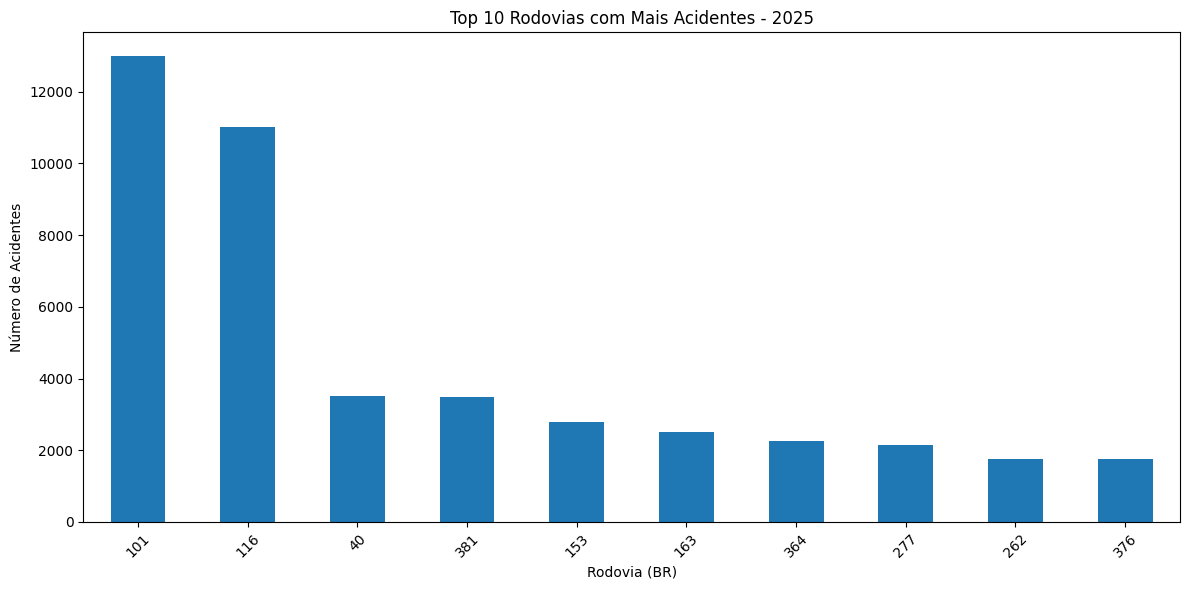

In [ ]:
acidentes_por_br = df.groupby('br')['id'].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
acidentes_por_br.plot(kind='bar')

plt.title('Top 10 Rodovias com Mais Acidentes - 2025')
plt.xlabel('Rodovia (BR)')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Insight:

* A BR-101 é a rodovia mais crítica do país em 2025, concentrando tanto o maior número de acidentes (13.006) quanto o maior número de mortes (760).

* A BR-116 aparece em segundo lugar, também com valores muito elevados em acidentes e óbitos.


**Análise Geral**

Os dados de 2025 mostram que os acidentes de trânsito nas rodovias federais não estão distribuídos de forma equilibrada pelo país.

Na análise por estados, observa-se que Minas Gerais, Santa Catarina e Paraná concentram o maior número de ocorrências, sendo as regiões com maior volume de acidentes registrados no período.

Quando a análise é feita por rodovias, duas se destacam de forma clara: BR-101 e BR-116.
Essas rodovias apresentaram tanto o maior número de acidentes quanto o maior número de mortes em 2025, indicando que são pontos críticos do sistema rodoviário brasileiro.

Insight principal

Os resultados mostram que o risco no trânsito está concentrado em locais específicos, principalmente em rodovias de grande movimentação e em estados com fluxo intenso de veículos.

2- Em quais meses, dias e horários acontecem mais acidentes?



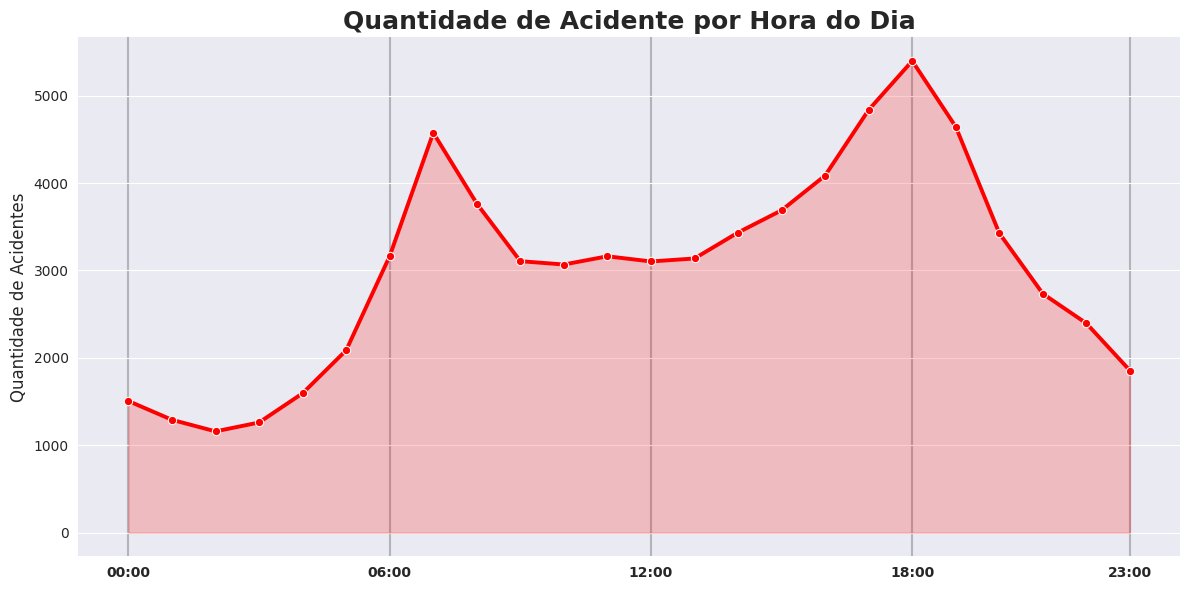

In [ ]:
df_horas = df.copy()
df_horas['hora'] = df_horas['horario'].dt.hour

# Agrupando os acidentes por hora
acidente_por_hora = pd.DataFrame(
    df_horas
    .groupby('hora')
    .size()
    .reset_index(name='quantidade')
)

plt.figure(figsize=(12,6))
sns.set_style('darkgrid')

cor_principal = "red"

# Plotando gráfico de linhas no SEABORN
sns.lineplot(
    data=acidente_por_hora,
    x='hora',
    y='quantidade',
    marker='o',
    color=cor_principal,
    linewidth= 2.8
)

# Preenchendo o gráfico com uma sombra abaixo da linha
plt.fill_between(
    acidente_por_hora['hora'],
    acidente_por_hora['quantidade'],
    color=cor_principal,
    alpha=0.2
)

# Título e Labels
plt.title('Quantidade de Acidente por Hora do Dia', fontsize=18, fontweight='bold')
plt.ylabel('Quantidade de Acidentes', fontsize=12)
plt.xlabel('')

# Ajustando rótulos do eixo x
plt.xticks(
    [0, 6, 12, 18, 23],
    ['00:00', '06:00', '12:00', '18:00', '23:00'],
    fontsize= 10,
    fontweight='bold'
)

plt.grid(axis='x', linestyle='-', alpha=0.5, color='gray', linewidth=1.5) # linhas no eixo x para visualizar melhor: madrugada, manhã, tarde e noite
sns.despine(left=True, bottom=True) # remove as bordas

plt.tight_layout()
plt.show()

**Análise do gráfico:**

O gráfico mostra que os acidentes não acontecem de forma uniforme ao longo do dia.
Há dois horários com maior concentração de ocorrências: no início da manhã e no final da tarde.

Os picos principais aparecem por volta de 7h–8h e entre 17h–19h, horários que coincidem com o deslocamento das pessoas para o trabalho e o retorno para casa.

Durante a madrugada, a quantidade de acidentes é bem menor, e no período da tarde os registros crescem de forma gradual até atingir o maior volume no início da noite.


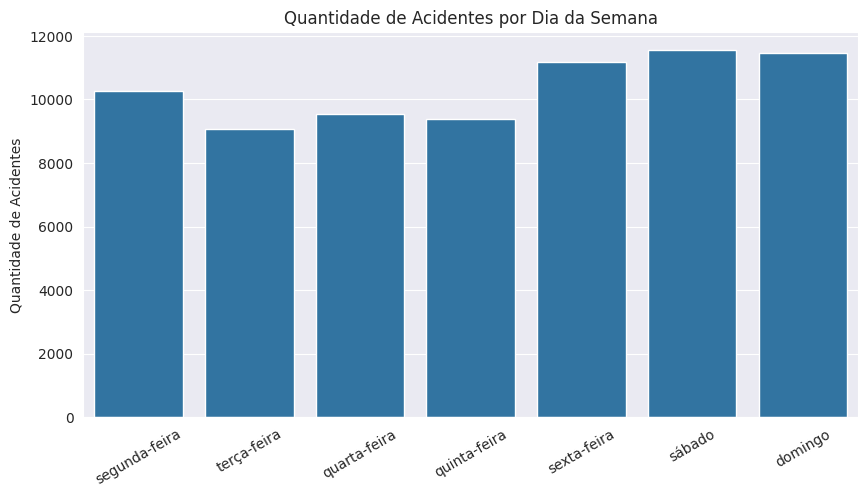

In [ ]:
# Agrupando por dia da semana
acidente_por_dia = (
    df_horas
    .groupby('dia_semana')
    .size()
    .reset_index(name='quantidade')
)

# Ordenação correta dos dias
ordem_dias = [
    'segunda-feira', 'terça-feira', 'quarta-feira',
    'quinta-feira', 'sexta-feira', 'sábado', 'domingo'
]

acidente_por_dia['dia_semana'] = pd.Categorical(
    acidente_por_dia['dia_semana'],
    categories=ordem_dias,
    ordered=True
)

acidente_por_dia = acidente_por_dia.sort_values('dia_semana')

plt.figure(figsize=(10,5))

sns.barplot(
    data=acidente_por_dia,
    x='dia_semana',
    y='quantidade'
)

plt.title('Quantidade de Acidentes por Dia da Semana')
plt.xlabel('')
plt.ylabel('Quantidade de Acidentes')
plt.xticks(rotation=30)
plt.show()


O gráfico mostra que os acidentes não acontecem de forma igual ao longo da semana.

Os maiores volumes ocorrem no fim de semana, principalmente no sábado e no domingo, que apresentam os picos mais altos de registros.

De segunda a quinta-feira, os números são um pouco menores e relativamente estáveis.
A partir da sexta-feira já se observa um aumento claro, que se intensifica até o sábado.



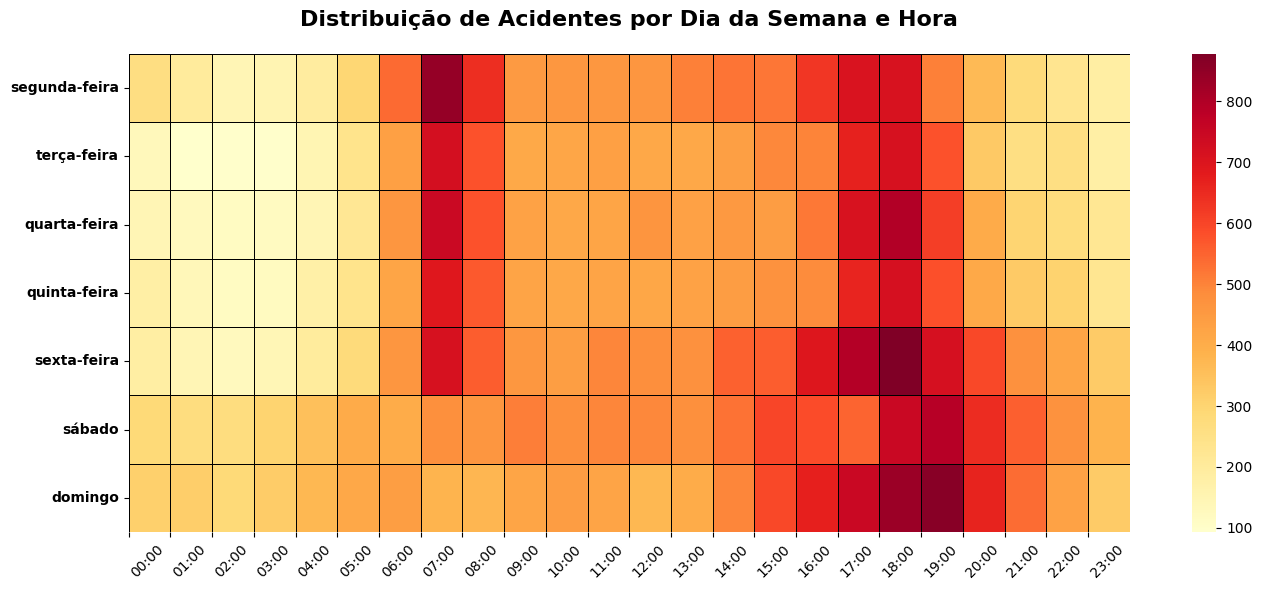

In [ ]:
# Agrupando a quantidade por dias da semana
dias_da_semana = pd.DataFrame(
    df_horas
    .groupby(['dia_semana', 'hora'])
    .size()
    .reset_index(name='quantidade')
)

# Ordenação dos dias da semana. ex: segunda, terça, quarta ...
ordem_dias = [
    'segunda-feira', 'terça-feira', 'quarta-feira', 'quinta-feira', 'sexta-feira', 'sábado', 'domingo'
]

# Ordenando
dias_da_semana['dia_semana'] = pd.Categorical(
    dias_da_semana['dia_semana'],
    categories=ordem_dias,
    ordered=True
)

# Criando uma tabela dinâmica com dias x horas
tabela_calor = dias_da_semana.pivot(index='dia_semana', columns='hora', values='quantidade')

# lista com todos os rótulos das horas para utilizar no xticks
cols = list(tabela_calor.columns)

# Criando a figura
plt.figure(figsize=(14, 6))

# cor do fundo do gráfico
plt.style.use('default')

sns.heatmap(
    tabela_calor,
    cmap='YlOrRd', # tons -> amarelo, laranja e vermelho
    linecolor='black',
    linewidths=0.5, # separação entre os quadros
)

plt.title('Distribuição de Acidentes por Dia da Semana e Hora', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('')
plt.ylabel('')

# Ajustando rótulos dos eixos
plt.yticks(fontweight='bold') # eixo y
plt.xticks(                   # eixo x
    ticks=range(len(cols)),
    labels=[f'{int(h):02d}:00'  for h in cols],
    rotation=45,
    ha='left'
)

plt.tight_layout()
plt.show()

O mapa de calor mostra que os acidentes seguem um padrão claro ao longo do dia.

Nos dias úteis, existem dois horários críticos:

* manhã (6h às 8h), período de deslocamento para trabalho e escola;

* final da tarde (17h às 19h), horário de retorno para casa.

A sexta-feira apresenta maior volume de acidentes no período da noite, principalmente entre 18h e 20h.

No fim de semana, o comportamento muda: os acidentes se concentram mais na tarde e na noite, com destaque para o domingo à noite, associado ao retorno de viagens.



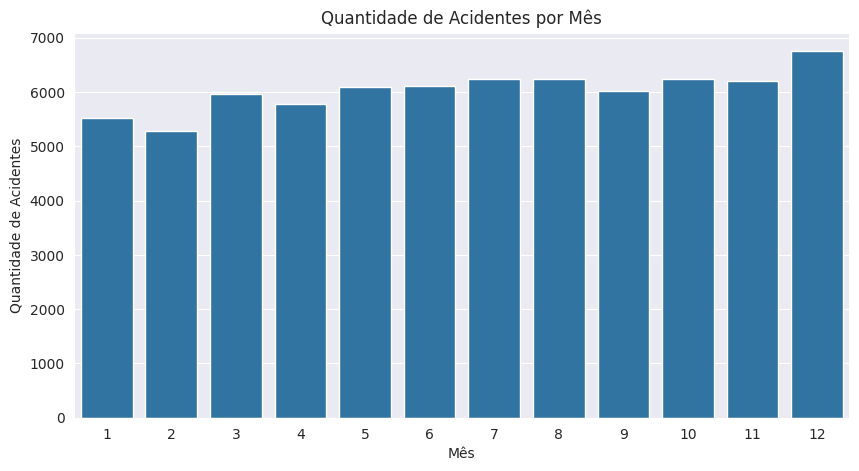

In [ ]:
df_meses = df.copy()

df_meses['data_inversa'] = pd.to_datetime(df_meses['data_inversa'])

df_meses['nome_mes'] = df_meses['data_inversa'].dt.month

acidentes_por_mes = (
    df_meses
    .groupby('nome_mes')
    .size()
    .reset_index(name='quantidade')
)

plt.figure(figsize=(10,5))

sns.barplot(
    data=acidentes_por_mes,
    x='nome_mes',
    y='quantidade'
)

plt.title('Quantidade de Acidentes por Mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Acidentes')
plt.show()

O gráfico mostra que os acidentes se distribuem de forma relativamente estável ao longo do ano.

Mesmo assim, observa-se que:

* Fevereiro apresenta o menor número de ocorrências.

* Há leve crescimento a partir de março.

* Dezembro é o mês com maior quantidade de acidentes.

**Análise Geral**

Em relação aos meses, não há grandes variações, mas observa-se que dezembro apresenta o maior número de acidentes, enquanto fevereiro registra o menor volume. Isso indica que períodos de maior movimento nas rodovias, como férias e fim de ano, tendem a concentrar mais ocorrências.

Quanto aos dias da semana, os registros são mais elevados de sexta-feira a domingo, com destaque para a sexta-feira, que apresenta os maiores volumes. Segunda e terça costumam ter quantidades um pouco menores.

Já em relação aos horários, existem dois momentos claramente mais críticos:

* Início da manhã (6h às 8h)

* Final da tarde e início da noite (17h às 19h)

Esses horários coincidem com os períodos de maior fluxo de veículos, como deslocamento para o trabalho e retorno para casa. No fim de semana, os acidentes se concentram principalmente no período da noite.

Insight principal

Os acidentes acontecem com maior frequência no mês de dezembro, nos finais de semana (principalmente sexta-feira) e nos horários de pico de tráfego, especialmente entre 6h–8h e 17h–19h.

3-Como fatores como clima, tipo de pista e condições da via influenciam a gravidade dos acidentes?    

In [ ]:
gravidade_clima = pd.crosstab(df['condicao_metereologica'], df['classificacao_acidente'], normalize='index')
gravidade_clima.sort_values(by='Com Vítimas Fatais', ascending=False)

classificacao_acidente,Com Vítimas Fatais,Com Vítimas Feridas,Sem Vítimas
condicao_metereologica,,,
Nevoeiro/Neblina,0.108499,0.699819,0.191682
Ignorado,0.100406,0.696755,0.202840
Vento,0.086538,0.750000,0.163462
Céu Claro,0.073705,0.771895,0.154401
Nublado,0.072622,0.780996,0.146382
Chuva,0.062325,0.774168,0.163506
Garoa/Chuvisco,0.059455,0.770851,0.169694
Sol,0.058824,0.819005,0.122172
Neve,0.000000,1.000000,0.000000


Insight:

* A maioria dos acidentes, em qualquer condição climática, resulta em vítimas feridas, não em óbitos.

* A condição com maior proporção de acidentes fatais é Nevoeiro/Neblina:

  * 10,8% dos acidentes nessa condição tiveram vítimas fatais.

* Em tempo bom (Céu Claro e Sol), o percentual de fatalidades é menor:

  * Entre 5,8% e 7,3%.

* Em dias de chuva, o percentual de acidentes fatais é de 6,2%, muito próximo ao de tempo bom.


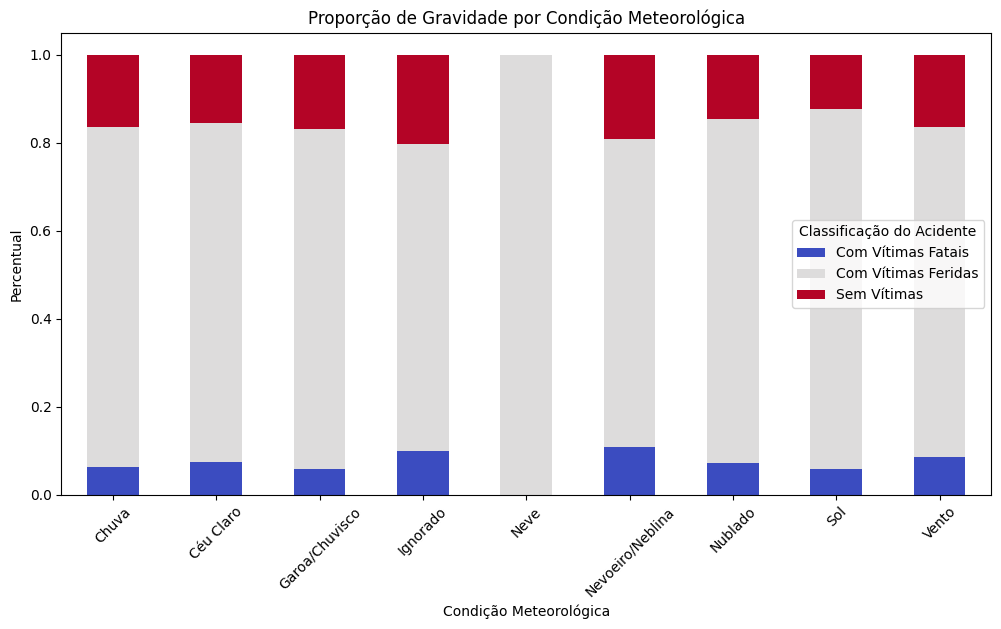

In [ ]:
#visualização em gráfico

gravidade_clima.plot(
    kind='bar',
    stacked=True,
    figsize=(12,6),
    colormap='coolwarm'
)

plt.title('Proporção de Gravidade por Condição Meteorológica')
plt.ylabel('Percentual')
plt.xlabel('Condição Meteorológica')
plt.legend(title='Classificação do Acidente')
plt.xticks(rotation=45)
plt.show()

Insight::

* Em todas as condições climáticas, a maioria dos acidentes resulta em vítimas feridas, não em óbitos.

* A condição com maior proporção de acidentes fatais é:

  * Nevoeiro/Neblina, indicando maior risco quando há baixa visibilidade.

* Outras condições com percentuais relativamente altos de fatalidade:

  * Vento

  * Registros classificados como “Ignorado”

* Acidentes em chuva não se mostraram mais graves que em tempo bom:

* A proporção de fatalidades em dias de chuva é semelhante à de céu claro e sol.

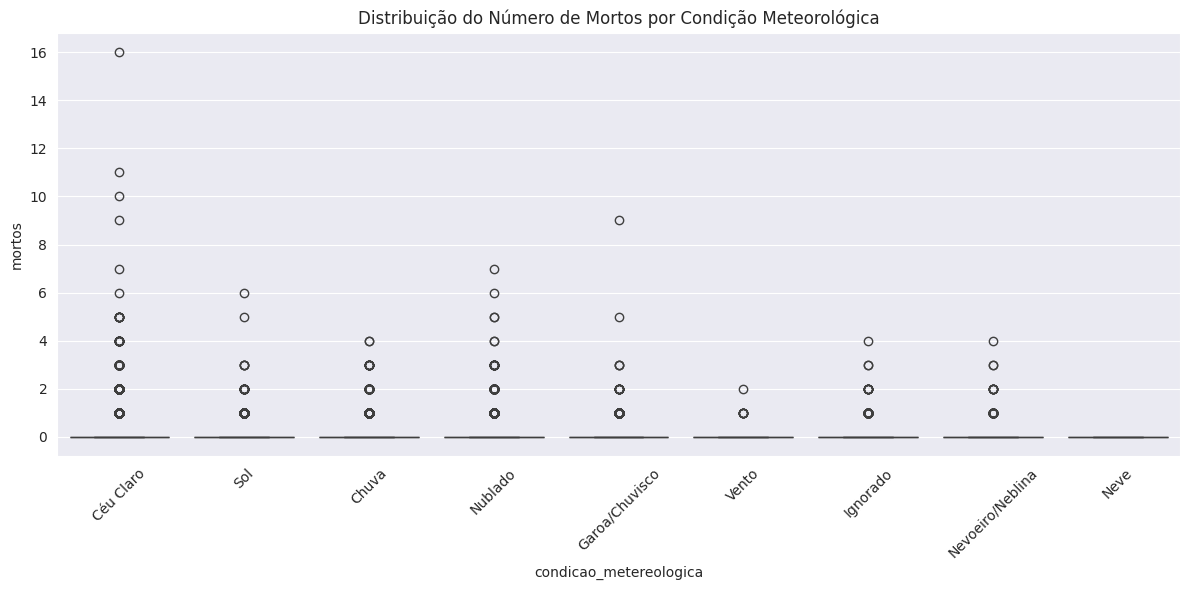

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

sns.boxplot(
    data=df,
    x='condicao_metereologica',
    y='mortos'
)

plt.title('Distribuição do Número de Mortos por Condição Meteorológica')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Insight:

* A gravidade dos acidentes, medida pelo número de mortos, não depende fortemente do clima.

* Mesmo com chuva, céu claro ou neblina, o padrão geral é parecido:

  * maioria dos acidentes sem mortes

  * poucos casos extremos que puxam a distribuição para cima.

* Os acidentes mais letais acontecem principalmente em condições comuns como céu claro e nublado, provavelmente porque são as situações mais frequentes no dia a dia.

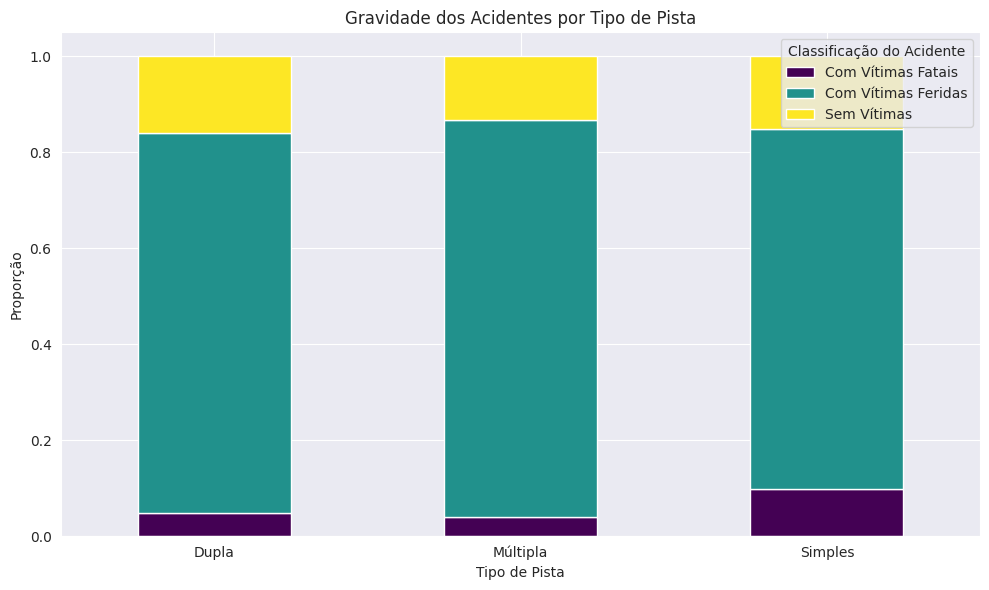

In [ ]:
tabela_pista = pd.crosstab(df['tipo_pista'], df['classificacao_acidente'], normalize='index')

tabela_pista.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    colormap='viridis'
)

plt.title('Gravidade dos Acidentes por Tipo de Pista')
plt.ylabel('Proporção')
plt.xlabel('Tipo de Pista')
plt.xticks(rotation=0)
plt.legend(title='Classificação do Acidente')

plt.tight_layout()
plt.show()

Insight

* O tipo de pista influencia diretamente a gravidade dos acidentes.

* Pistas simples são mais perigosas, pois concentram a maior proporção de ocorrências com vítimas fatais.

* Pistas duplas e múltiplas tendem a ser mais seguras, possivelmente por oferecerem melhor separação entre fluxos e mais estrutura viária.

In [ ]:
pd.crosstab(df['tracado_via'], df['classificacao_acidente'], normalize='index')


classificacao_acidente,Com Vítimas Fatais,Com Vítimas Feridas,Sem Vítimas
tracado_via,,,
Aclive,0.067204,0.741935,0.190860
Aclive;Curva,0.084770,0.764368,0.150862
Aclive;Curva;Em Obras,0.000000,1.000000,0.000000
Aclive;Curva;Interseção de Vias,0.090909,0.909091,0.000000
Aclive;Curva;Interseção de Vias;Em Obras,0.000000,1.000000,0.000000
...,...,...,...
Viaduto;Retorno Regulamentado;Interseção de Vias;Rotatória,0.000000,1.000000,0.000000
Viaduto;Retorno Regulamentado;Reta,0.000000,1.000000,0.000000
Viaduto;Rotatória,0.000000,0.846154,0.153846


Insight

* O traçado da via influencia diretamente a gravidade dos acidentes.

* Quanto mais complexo o traçado, maior tende a ser o risco de fatalidade.

* Curvas, interseções e trechos em obras aparecem como os cenários mais críticos.

* Vias retas e com menor interferência estrutural apresentam menor gravidade.

**Conclusão da Análise (EDA)**

A análise dos acidentes rodoviários registrados pela PRF em 2025 mostrou padrões claros sobre onde, quando e como os acidentes acontecem nas rodovias federais.

Os acidentes não acontecem de forma aleatória. Eles se concentram em estados como Minas Gerais, Santa Catarina e Paraná, principalmente nas rodovias BR-101 e BR-116, que registraram mais ocorrências e vítimas fatais.

Quanto ao horário, os períodos mais críticos são de manhã (6h às 8h) e no final da tarde (17h às 19h) durante os dias úteis. Nos fins de semana, o número de acidentes aumenta à noite, especialmente nas sextas e domingos, quando o fluxo de veículos é maior.

Fatores como clima, tipo de pista e condição da estrada influenciam na gravidade dos acidentes. Trechos com curvas, aclives ou pistas simples e em condições meteorológicas ruins tiveram mais acidentes graves ou fatais.

A maioria dos acidentes resulta em feridos, mostrando que a segurança no trânsito ainda é um grande desafio.

De forma geral, os acidentes estão ligados ao fluxo de veículos, à infraestrutura da estrada e ao comportamento dos motoristas. Com isso, é importante:

* Melhorar a infraestrutura das rodovias;

* Dar atenção especial a trechos críticos;

* Intensificar a fiscalização em horários de pico;

* Promover campanhas de direção defensiva;

* Usar os dados para planejar políticas públicas de segurança viária.

Este estudo mostra como a análise de dados ajuda a tomar decisões e reduzir acidentes, transformando informações em ações práticas para a sociedade.